In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('MICRODADOS_ENEM_2023.csv', encoding='latin1', sep=';')

In [3]:
print(data[['SG_UF_PROVA']].head(10))

  SG_UF_PROVA
0          DF
1          DF
2          RS
3          CE
4          CE
5          BA
6          PE
7          MG
8          BA
9          SP


In [4]:
# Function to add 

# Distribuição de Faixa Etária dos Inscritos no ENEM 2023

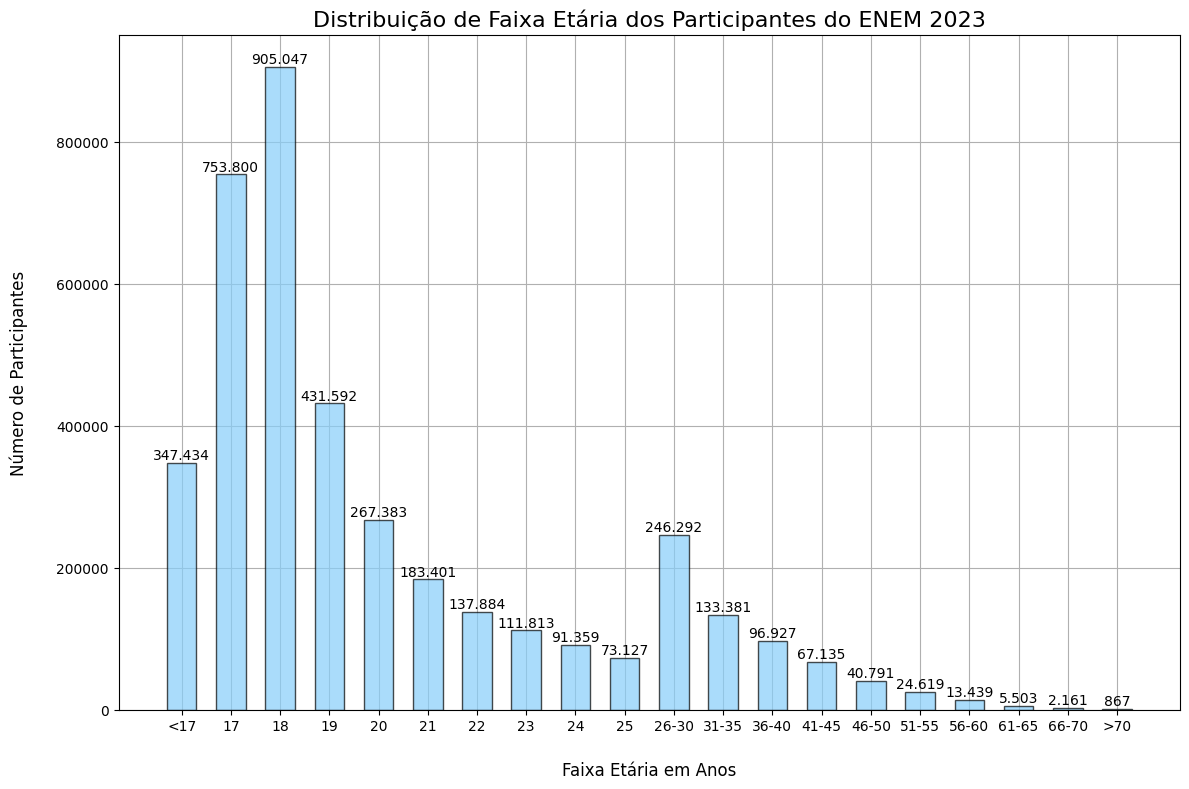

In [5]:
age_distribution_map = {
    1: "<17", 
    2: "17", 
    3: "18", 
    4: "19", 
    5: "20", 
    6: "21", 
    7: "22", 
    8: "23", 
    9: "24", 
    10: "25", 
    11: "26-30", 
    12: "31-35", 
    13: "36-40", 
    14: "41-45", 
    15: "46-50", 
    16: "51-55", 
    17: "56-60", 
    18: "61-65", 
    19: "66-70", 
    20: ">70"
}       

data["Faixa Etária"] = data["TP_FAIXA_ETARIA"].map(age_distribution_map)
age_distribution_order = list(age_distribution_map.values())
    
age_distribution = data["Faixa Etária"].value_counts()
age_distribution = age_distribution.reindex(age_distribution_order, fill_value=0)

plt.figure(figsize=(12, 8))
bars = plt.bar(age_distribution.index, age_distribution.values, color="lightskyblue", edgecolor="black", width=0.6, zorder=2, alpha=0.7)
    
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 5000, 
        f"{height:,.0f}".replace(",", "."), 
        ha="center", 
        fontsize=10
    )
    
plt.title("Distribuição de Faixa Etária dos Participantes do ENEM 2023", fontsize=16)
plt.xlabel("Faixa Etária em Anos", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(ha="center", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(zorder=0)

plt.tight_layout()
plt.show()


# Número de Inscritos no ENEM 2023 por Região

In [6]:
regions = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MS", "MT"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

In [7]:
def get_region(uf):
    for region, ufs in regions.items():
        if uf in ufs:
            return region

data["ST_REGIAO"] = data["SG_UF_PROVA"].apply(get_region)

In [8]:
participants_by_region = data["ST_REGIAO"].value_counts().reset_index()
participants_by_region.columns = ["Região", "Número de Inscritos"]

participants_by_region["Números Formatados"] = participants_by_region["Número de Inscritos"].apply(
    lambda x: f"{x:,.0f}".replace(",", ".")
)

print(participants_by_region)

         Região  Número de Inscritos Números Formatados
0      Nordeste              1423999          1.423.999
1       Sudeste              1305362          1.305.362
2         Norte               453454            453.454
3           Sul               417688            417.688
4  Centro-Oeste               333452            333.452


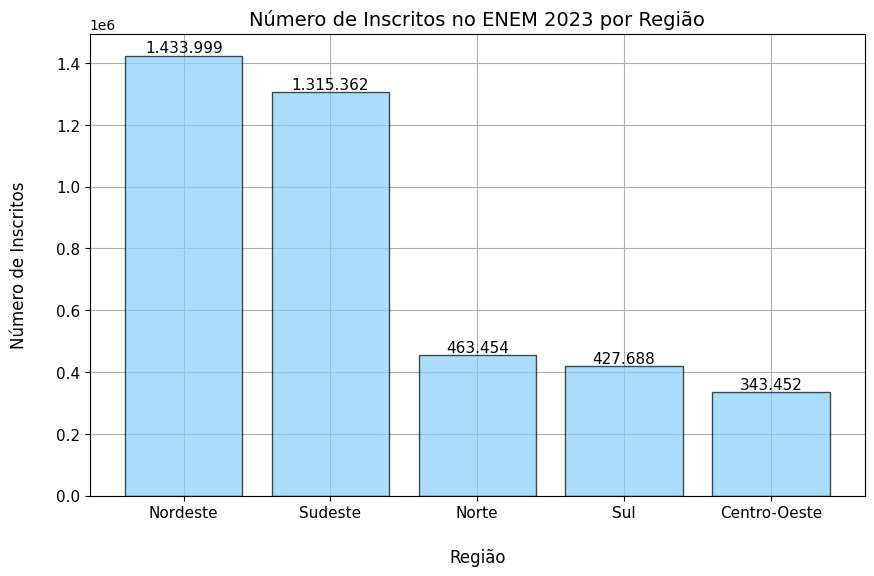

In [25]:
plt.figure(figsize=(10, 6))
bars = plt.bar(
    participants_by_region["Região"], 
    participants_by_region["Número de Inscritos"], 
    color="lightskyblue", 
    edgecolor="black",
    alpha=0.7,
    zorder=2,
)

for bar in bars:
    height = bar.get_height() + 10000
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,.0f}".replace(",", "."),
        ha="center", 
        fontsize=11,
        color="black"
    )

plt.title("Número de Inscritos no ENEM 2023 por Região", fontsize=14)
plt.xlabel("Região", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(zorder=2)

plt.tight_layout()
plt.show()

# Número de Inscritos no ENEM 2023 por Região e Sexo

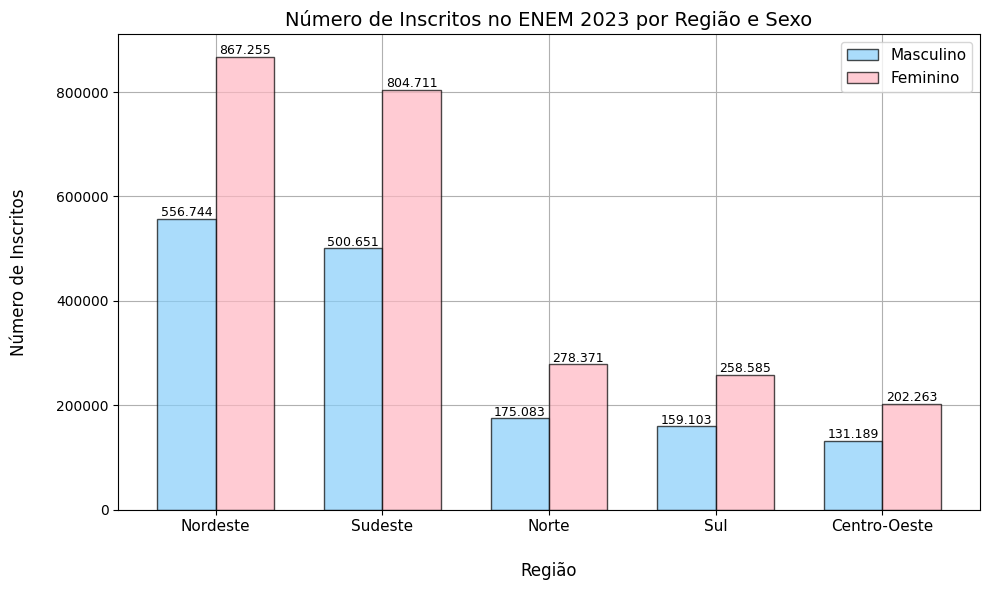

In [10]:
sex_type_and_region_data = data[["TP_SEXO", "ST_REGIAO"]]

grouped_data = sex_type_and_region_data.groupby(["ST_REGIAO", "TP_SEXO"]).size().reset_index(name="Número de Inscritos")

total_by_region = grouped_data.groupby("ST_REGIAO")["Número de Inscritos"].sum().sort_values(ascending=False)

grouped_data["ST_REGIAO"] = pd.Categorical(
    grouped_data["ST_REGIAO"], 
    categories=total_by_region.index, 
    ordered=True
)

grouped_data = grouped_data.sort_values(["ST_REGIAO", "TP_SEXO"])

pivot_data = grouped_data.pivot(index="ST_REGIAO", columns="TP_SEXO", values="Número de Inscritos").fillna(0)

x = np.arange(len(pivot_data))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars_m = ax.bar(x - width/2, pivot_data.get("M", 0), width, label="Masculino", color="lightskyblue", edgecolor="black", alpha=0.7, zorder=2)
bars_f = ax.bar(x + width/2, pivot_data.get("F", 0), width, label="Feminino", color="lightpink", edgecolor="black", alpha=0.7, zorder=2)

for bars in [bars_m, bars_f]:
    for rect in bars:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2,
            height + 5000, 
            f"{height:,.0f}".replace(",", "."),
            ha="center",
            fontsize=9
        )

ax.set_title("Número de Inscritos no ENEM 2023 por Região e Sexo", fontsize=14)
ax.set_xlabel("Região", fontsize=12, labelpad=20)
ax.set_ylabel("Número de Inscritos", fontsize=12, labelpad=20)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, fontsize=11)
ax.legend(fontsize=11)
plt.grid(zorder=0)

plt.tight_layout()
plt.show()

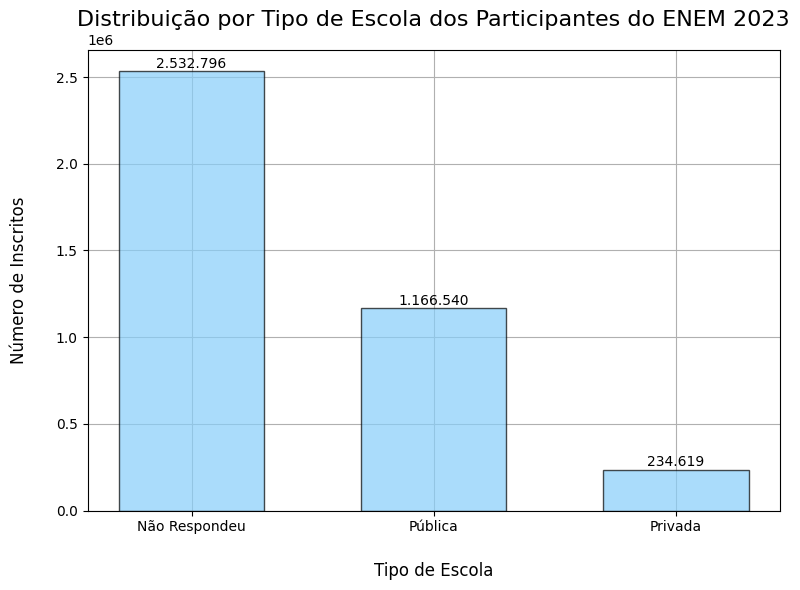

In [26]:
school_type_map = {
    1: "Não Respondeu",
    2: "Pública",
    3: "Privada"
}

data["Tipo de Escola"] = data["TP_ESCOLA"].map(school_type_map)

school_type_distribution = data["Tipo de Escola"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(
    school_type_distribution.index, 
    school_type_distribution.values, 
    color="lightskyblue", 
    edgecolor="black", 
    width=0.6, 
    alpha=0.7, 
    zorder=2
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 20000, 
        f"{height:,.0f}".replace(",", "."), 
        ha="center", 
        fontsize=10
    )

plt.title("Distribuição por Tipo de Escola dos Participantes do ENEM 2023", fontsize=16)
plt.xlabel("Tipo de Escola", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(zorder=0)

plt.tight_layout()
plt.show()


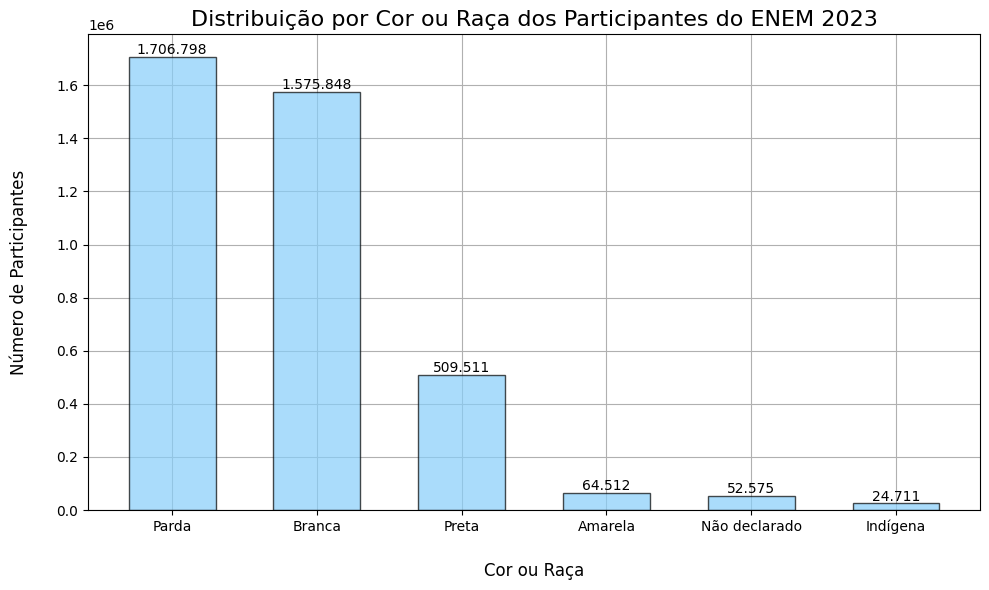

In [14]:
race_map = {
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
    6: "Não dispõe da informação"
}

data["Cor ou Raça"] = data["TP_COR_RACA"].map(race_map)

race_distribution = data["Cor ou Raça"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(race_distribution.index, race_distribution.values, color="lightskyblue", edgecolor="black", width=0.6, alpha=0.7, zorder=2)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 10000, 
        f"{height:,.0f}".replace(",", "."), 
        ha="center", 
        fontsize=10
    )

# Personalizar o gráfico
plt.title("Distribuição por Cor ou Raça dos Participantes do ENEM 2023", fontsize=16)
plt.xlabel("Cor ou Raça", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(zorder=0)

plt.show()


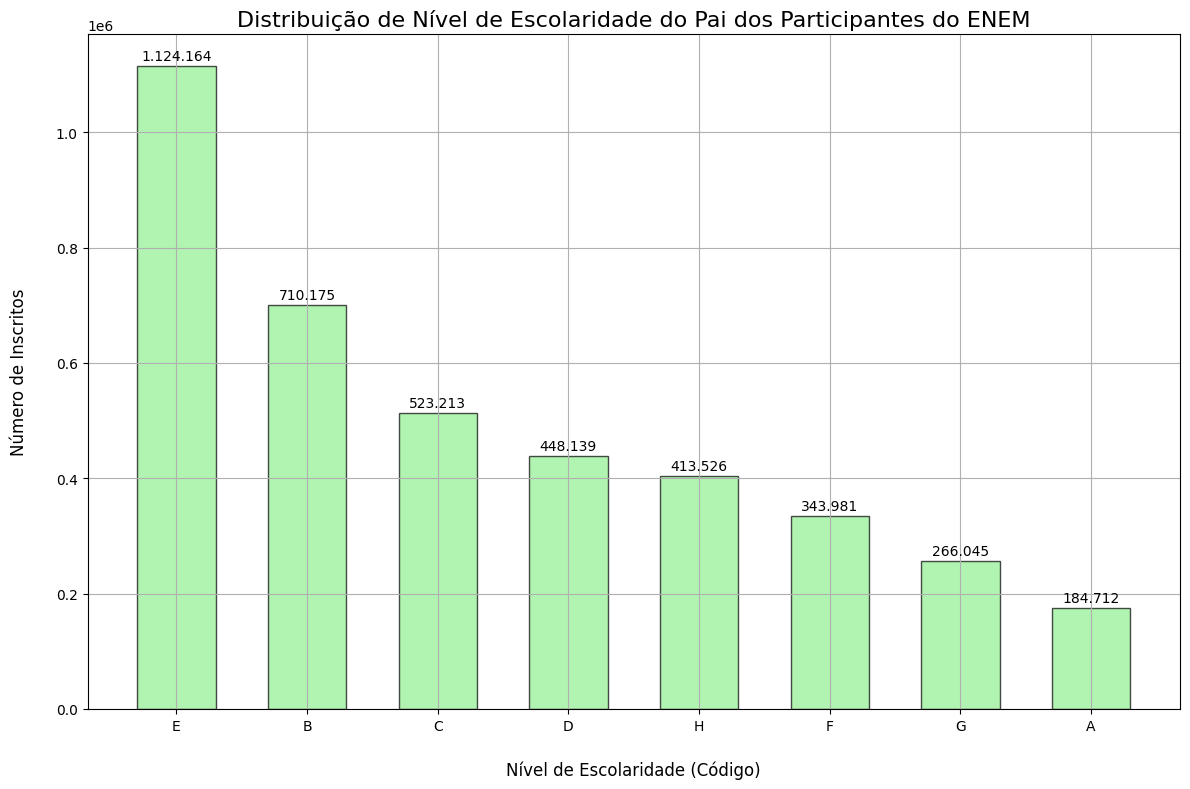

In [27]:
q001_map = {
    "A": "Nunca estudou",
    "B": "Não completou a 4ª série/5º ano do Ensino Fundamental",
    "C": "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
    "D": "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
    "E": "Completou o Ensino Médio, mas não completou a Faculdade",
    "F": "Completou a Faculdade, mas não completou a Pós-graduação",
    "G": "Completou a Pós-graduação",
    "H": "Não sei"
}

q001_distribution = data["Q001"].value_counts()

plt.figure(figsize=(12, 8))
bars = plt.bar(q001_distribution.index, q001_distribution.values, color="lightgreen", edgecolor="black", width=0.6, alpha=0.7, )

for bar in bars:
    height = bar.get_height() + 10000
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f"{height:,.0f}".replace(",", "."), ha="center", fontsize=10)

plt.title("Distribuição de Nível de Escolaridade do Pai dos Participantes do ENEM", fontsize=16)
plt.xlabel("Nível de Escolaridade (Código)", fontsize=12, labelpad=20)
plt.ylabel("Número de Inscritos", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(zorder=0)

plt.tight_layout()
plt.show()